In [1]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn import tree
import graphviz

In [2]:
d = datasets.load_breast_cancer(return_X_y=False)

# explanation
print(d.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [3]:
# features
df = pd.DataFrame(d.data, columns = d.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# classes
print(d.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [5]:
X, y = datasets.load_breast_cancer(return_X_y=True)
dt = tree.DecisionTreeClassifier(min_samples_leaf = 1)
dt.fit(X, y)
print(dt.feature_importances_)

[0.         0.04248468 0.         0.         0.         0.00583135
 0.         0.00877112 0.00563858 0.         0.         0.
 0.         0.00936121 0.00100384 0.03184137 0.         0.
 0.         0.         0.69559352 0.05252069 0.         0.01672448
 0.01440488 0.         0.00872741 0.10709688 0.         0.        ]


In [6]:
dot_data = tree.export_graphviz(dt, out_file=None,feature_names=d.feature_names,  
                         class_names=d.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = graphviz.Source(dot_data).view()
#graph.render("bc") 

In [6]:
##########################################
##########################################
##########################################
##########################################

In [2]:
# Digits
digits = datasets.load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each bloc

In [3]:
df = pd.DataFrame(digits.data)
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,4.0,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0


In [9]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

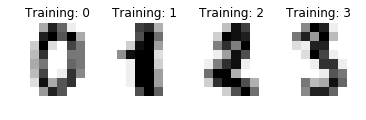

In [4]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [6]:
# reading data as matrices
X, y = datasets.load_digits(return_X_y = True)

In [7]:
# shuffling and separating train and test indices
I = np.array(range(len(y)))
np.random.shuffle(I)
trainSize = int(0.9 * len(I))
train, test = I[:trainSize], I[trainSize:]

In [8]:
# binarizing
#def f(x):
#    return 1.0 if x > 7 else 0.0
#f = np.vectorize(f)
#newX = f(X)
newX = X

In [9]:
# train and test
XTrain = newX[train]
XTest = newX[test]
YTrain = y[train]
YTest = y[test]

model = tree.DecisionTreeClassifier()
model.fit(XTrain, YTrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [10]:
dot_data = tree.export_graphviz(model, out_file=None,
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = graphviz.Source(dot_data).view()

In [11]:
# predicting the unseen data
model.predict(XTest)

array([4, 2, 6, 6, 9, 0, 0, 3, 1, 0, 5, 2, 5, 4, 4, 3, 1, 0, 5, 9, 2, 1,
       4, 3, 7, 0, 5, 2, 7, 3, 1, 5, 5, 7, 9, 9, 5, 2, 1, 7, 9, 2, 2, 3,
       5, 0, 3, 7, 9, 4, 9, 6, 0, 8, 7, 5, 6, 6, 1, 1, 2, 6, 6, 2, 4, 7,
       4, 5, 4, 6, 9, 9, 6, 1, 0, 7, 9, 5, 2, 0, 9, 1, 8, 7, 9, 8, 2, 1,
       7, 8, 2, 4, 2, 4, 7, 8, 0, 4, 5, 8, 5, 5, 5, 2, 2, 4, 9, 4, 2, 0,
       6, 8, 2, 9, 9, 2, 9, 9, 6, 6, 3, 9, 0, 6, 5, 6, 4, 6, 6, 7, 9, 9,
       6, 1, 3, 8, 3, 3, 1, 0, 1, 0, 2, 4, 4, 4, 5, 0, 6, 7, 6, 3, 5, 9,
       3, 3, 9, 9, 6, 8, 6, 9, 2, 0, 0, 0, 1, 1, 0, 9, 0, 9, 5, 0, 6, 7,
       3, 8, 3, 5])

In [12]:
YTest

array([4, 2, 6, 6, 9, 0, 0, 3, 1, 0, 5, 3, 5, 4, 5, 3, 1, 0, 5, 9, 2, 1,
       4, 3, 4, 0, 5, 2, 6, 3, 1, 5, 5, 7, 9, 9, 3, 2, 8, 7, 3, 2, 2, 3,
       5, 0, 9, 7, 9, 4, 9, 6, 0, 1, 7, 5, 6, 6, 1, 1, 1, 6, 6, 2, 1, 7,
       4, 5, 4, 6, 9, 9, 6, 2, 0, 7, 3, 5, 2, 0, 9, 1, 8, 7, 9, 8, 2, 1,
       7, 3, 2, 4, 2, 4, 7, 8, 0, 4, 2, 2, 5, 5, 5, 2, 2, 2, 9, 1, 2, 0,
       6, 8, 2, 9, 9, 2, 3, 7, 6, 6, 3, 9, 0, 6, 3, 6, 4, 6, 6, 7, 9, 9,
       6, 1, 8, 8, 8, 3, 1, 0, 1, 0, 2, 4, 4, 9, 3, 0, 6, 7, 6, 3, 5, 9,
       3, 3, 9, 9, 6, 8, 6, 9, 2, 0, 0, 0, 9, 2, 0, 9, 0, 9, 5, 0, 6, 6,
       5, 2, 3, 5])

In [13]:
# computing accuracy
acc = model.predict(XTest) == YTest
acc

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,

In [14]:
len(list(filter(lambda w: w, acc))) / (1.0 * len(acc))

0.8333333333333334